# 2016 Youth Spring Break 

+ Load data
+ Insight & visualization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.stats import pearsonr
%matplotlib inline

# Load data 
load data from Data.csv from row 11 to row 5503

In [2]:
data = pd.read_csv('Data.csv', skiprows=10, skipfooter=1, engine='python') # ingore the first 10 and last 1 rows
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5492 entries, 0 to 5491
Data columns (total 15 columns):
Campaign                               5492 non-null object
Site (DCM)                             5492 non-null object
Placement                              5492 non-null object
Date                                   5492 non-null object
Creative                               5492 non-null object
Creative Pixel Size                    5492 non-null object
State/Region                           5492 non-null object
Impressions                            5492 non-null int64
Clicks                                 5492 non-null int64
Active View: Viewable Impressions      5492 non-null int64
Active View: Measurable Impressions    5492 non-null int64
Total Conversions                      5492 non-null int64
Media Cost                             5492 non-null float64
Planned Media Cost                     5492 non-null float64
Total Revenue                          5492 non-null flo

In [3]:
data.describe()

,Impressions,Clicks,Active View: Viewable Impressions,Active View: Measurable Impressions,Total Conversions,Media Cost,Planned Media Cost,Total Revenue
count,5492.000000,5492.000000,5492.000000,5492.000000,5492.000000,5492.000000,5492.000000,5492.000000
mean,1412.802804,12.213948,331.360524,774.705208,14.897669,3.401794,7.381368,95.431457
std,14030.772793,200.688109,3863.997541,9087.926055,57.698212,46.933003,20.241826,445.518282
min,0.000000,0.000000,0.000000,-8.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,4.000000,0.000000,2.531648,0.000000
max,323977.000000,8547.000000,94251.000000,215947.000000,922.000000,1945.000000,105.517241,6706.769999


#  Insight & visualization


## What has performed best in this campaign? Why?

**Facebook** performs best in this campaign because the larget "profit" occurs via Facebook. (ROI is not enough, we should also ensure a large scale so that the total(profit) can determine which site is best.

I also explored the "total conversions" to check how "total conversions" performed, but I realized that "total conversions" is the number of conversions. A series of spercific "conversion rates"(conversion rate of pay, etc) will be better to explain how it matters to the campaign, and optimize the conversion rate of the last step is much better than starting from the beginning.

In [36]:
site_group = data.groupby('Site (DCM)')['Impressions','Active View: Measurable Impressions', 'Active View: Viewable Impressions', 
                                       'Clicks','Total Conversions', 'Media Cost', 'Planned Media Cost', 'Total Revenue'].agg('sum')
site_group['Profit'] = (site_group['Total Revenue'] - site_group['Media Cost'])
site_group['ROI'] = site_group['Profit'] / site_group['Media Cost']
site_group['CTR']= site_group['Clicks'] / site_group['Active View: Viewable Impressions']

site_group

,Impressions,Active View: Measurable Impressions,Active View: Viewable Impressions,Clicks,Total Conversions,Media Cost,Planned Media Cost,Total Revenue,Profit,ROI,CTR
Site (DCM),,,,,,,,,,,
Accuen,162,130,542,1,25,0.036000,5189.869831,258.770000,258.734000,7187.055556,0.001845
Facebook,1034662,0,0,47246,39478,5733.499964,10815.517182,287809.349973,282075.850009,49.197846,inf
Google,6500470,4036266,1732948,18923,34865,9999.999973,9999.999849,195175.189985,185175.190012,18.517519,0.010920
Out of the Box Media (OBOX),223819,218285,86342,321,5527,2655.614983,7464.118388,32307.770000,29652.155017,11.165834,0.003718
Twitter,0,0,0,588,1923,293.500000,7068.965472,8558.479999,8264.979999,28.160068,inf


Text(0.5,1,'Conversions of Each Sites (DCM)')

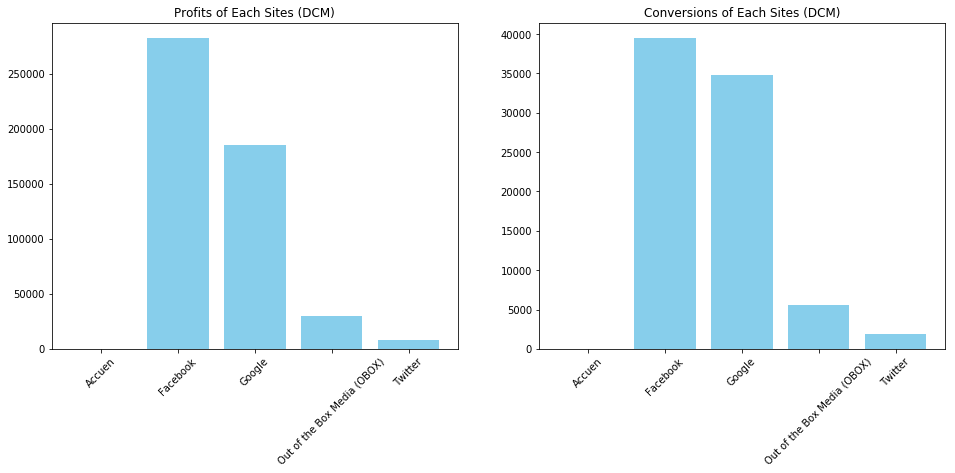

In [37]:
fig = plt.figure(figsize =(16, 6))

plt.subplot(121)
plt.bar(site_group.index, site_group['Profit'], color='skyblue')
plt.xticks(rotation = 45)
plt.title('Profits of Each Sites (DCM)')

plt.subplot(122)
plt.bar(site_group.index, site_group['Total Conversions'], color='skyblue')
plt.xticks(rotation = 45)
plt.title('Conversions of Each Sites (DCM)')

Text(0.5,1,'Number of Site (DCM)')

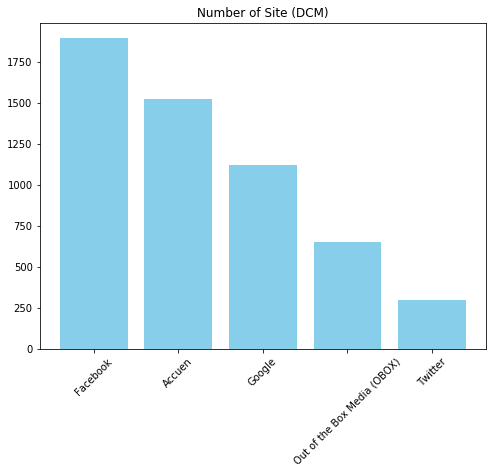

In [38]:
cols = data['Site (DCM)'].value_counts().index
fig, ax = plt.subplots(figsize=(8,6))
plt.bar(cols, data['Site (DCM)'].value_counts(), color='skyblue')
plt.xticks(rotation = 45)
plt.title('Number of Site (DCM)')

## What are your recommendations for improving the next campaign?

I calculated the "ROI" & "CTR" of each sites and found the Accuen has largest "ROI", but a lower "CTR", while Facebook has a larger "CTR", but a lower "ROI". A high ROI mean there will be more profits when we pay same amount of money(cost) as investment, and a high CTR means that people has high interest in corresponding creative. I recommend that:

+ For Accuen: high ROI, low CTR. There exists potential growth, so that we should make Active View more attractive to increase CTR.
+ For Google: low ROI, high CTR, Increase conversion rates to boost ROI
+ For OBOX: low ROI, low CTR. Increase conversion rates and make Active View more attractive.


Text(0,0.5,'CTR')

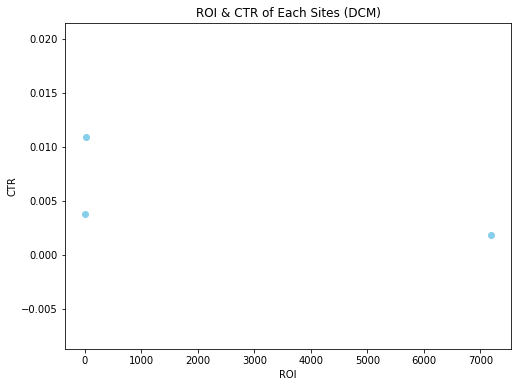

In [39]:
fig = plt.figure(figsize =(8, 6))
plt.scatter(site_group['ROI'], site_group['CTR'], color='skyblue')
plt.title('ROI & CTR of Each Sites (DCM)')
plt.xlabel('ROI')
plt.ylabel('CTR')

## Can you summarize the performance of this campaign on 1 page, promoting popularization using graphs.

+ Profit by State/Site
+ Profit Trend by Date
+ RoI & CTR by Site
+ RoI & CTR by Site

Details in the **summary.pdf** file

## Please update the most relevant performance indicators in your analysis

In [42]:
state_group['ROI'] = state_group['Profit'] / state_group['Media Cost']
state_group['CTR']= state_group['Clicks'] / state_group['Active View: Viewable Impressions']

state_group['ROI'].sort_values(ascending = False)

State/Region
NF           274.405782
MA           233.199949
PE           226.471458
BC           155.306826
NB           141.625814
CA            97.854769
VT            60.282645
ON            39.375765
(not set)     12.060018
AB            10.955376
QC             9.624873
FL             9.343069
NY             4.432068
MI             4.291239
IN            -1.000000
LA            -1.000000
KS            -1.000000
AZ            -1.000000
CT            -1.000000
CO            -1.000000
DC            -1.000000
HI            -1.000000
GA            -1.000000
MB            -1.000000
DE            -1.000000
IL            -1.000000
WA            -1.000000
MD            -1.000000
OR            -1.000000
VA            -1.000000
                ...    
SK            -1.000000
RI            -1.000000
PA            -1.000000
OH            -1.000000
ME            -1.000000
NV            -1.000000
NS            -1.000000
NJ            -1.000000
NH            -1.000000
NC            -1.000000
MO 

In [44]:
state_group['Profit'].sort_values(ascending = False)

State/Region
ON           426285.765173
QC            71163.420015
(not set)      4073.196212
BC             1409.653429
CA              885.906719
MA              714.486165
NB              289.495910
MI              240.107131
VT              111.972541
NF               92.323551
FL               56.141145
NY               54.412908
PE               36.777606
AB               35.307182
KY                0.000000
ND                0.000000
WY                0.000000
MT                0.000000
MS                0.000000
UT                0.000000
ID                0.000000
IA                0.000000
WI                0.000000
WV                0.000000
AL                0.000000
AK                0.000000
NE                0.000000
YT                0.000000
NM                0.000000
NT                0.000000
                 ...      
ME               -0.162394
RI               -0.164656
LA               -0.164656
TN               -0.164656
GA               -0.164656
NV             

In [45]:
site_group['CTR'].sort_values(ascending = False)

Site (DCM)
Twitter                             inf
Facebook                            inf
Google                         0.010920
Out of the Box Media (OBOX)    0.003718
Accuen                         0.001845
Name: CTR, dtype: float64

In [46]:
site_group['Profit'].sort_values(ascending = False)

Site (DCM)
Facebook                       282075.850009
Google                         185175.190012
Out of the Box Media (OBOX)     29652.155017
Twitter                          8264.979999
Accuen                            258.734000
Name: Profit, dtype: float64

In [47]:
site_group['ROI'].sort_values(ascending = False)

Site (DCM)
Accuen                         7187.055556
Facebook                         49.197846
Twitter                          28.160068
Google                           18.517519
Out of the Box Media (OBOX)      11.165834
Name: ROI, dtype: float64